# 1. Learning rate
## To find better learning rate, visualize how cost function decreases.
## 1.1 With small learning rate : 1e-10

In [1]:
import numpy as np
import tensorflow as tf
tf.set_random_seed(777)

In [2]:
x_data = np.array([[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]])

y_data = np.array([[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]])

x_test = np.array([[2, 1, 1], [3, 1, 2], [3, 3, 4]])

y_test = np.array([[0, 0, 1], [0, 0, 1], [0, 0, 1]])

In [3]:
X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [4]:
with tf.name_scope('Cost'):
    cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
    tf.summary.scalar("CrossEntropy", cost)

In [5]:
with tf.name_scope('Optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-10)
    train = optimizer.minimize(cost)

In [6]:
LOGDIR = './tensorboard-log/log-small_lr'

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter(LOGDIR, sess.graph)
    merged= tf.summary.merge_all()
        
    for step in range(5000):
        _, summary = sess.run([train, merged], feed_dict={X: x_data, Y: y_data})
        writer.add_summary(summary, step)

## 1.2 With large learning rate : 1.5

In [8]:
with tf.name_scope('Optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=1.5)
    train = optimizer.minimize(cost)

In [9]:
LOGDIR = './tensorboard-log/log-large_lr'

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter(LOGDIR, sess.graph)
    merged= tf.summary.merge_all()
        
    for step in range(5000):
        _, summary = sess.run([train, merged], feed_dict={X: x_data, Y: y_data})
        writer.add_summary(summary, step)

## 1.3 With proper learning rate : 0.1

In [11]:
with tf.name_scope('Optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train = optimizer.minimize(cost)

In [12]:
LOGDIR = './tensorboard-log/log-lr'

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter(LOGDIR, sess.graph)
    merged= tf.summary.merge_all()
        
    for step in range(5000):
        _, summary = sess.run([train, merged], feed_dict={X: x_data, Y: y_data})
        writer.add_summary(summary, step)

### tensorboard --logdir=./tensorboard-log

### ![cross entropy](https://github.com/ChulBal/practice_makes_perfect/blob/master/cross.png?raw=true)

## 'Why no graph with large learning rate?' 
### Small learning rate? There are outputs although it does not decrease.

In [26]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-10).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(5000):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step % 500 == 0:
            print(step, cost_val, W_val)

0 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
500 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
1000 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
1500 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
2000 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
2500 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
3000 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.50825703]
 [ 0.75722361 -0.7008909  -2.10820389]]
3500 5.73203 [[ 0.80269563  0.67861295 -1.21728313]
 [-0.3051686  -0.3032113   1.508257

### Big learning rate? There are 'nan's.

In [27]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1.5).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(5000):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        if step % 500 == 0:
            print(step, cost_val, W_val)

0 5.73203 [[-0.30548954  1.22985029 -0.66033536]
 [-4.39069986  2.29670858  2.99386835]
 [-3.34510708  2.09743214 -0.80419564]]
500 nan [[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]
1000 nan [[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]
1500 nan [[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]
2000 nan [[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]
2500 nan [[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]
3000 nan [[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]
3500 nan [[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]
4000 nan [[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]
4500 nan [[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]


# 2. Scaling
## 2.1 Min-Max Scaler
### step 1000, learning rate 0.1

In [15]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_data1 = xy[:, 0:-1]
y_data1 = xy[:, [-1]]

X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(1001):
    cost_val, _, _ = sess.run([cost, hypothesis, train], feed_dict={X: x_data1, Y: y_data1})
    if step % 100 == 0:
        print(step, "Cost: ", cost_val)

0 Cost:  2.02763e+11
100 Cost:  nan
200 Cost:  nan
300 Cost:  nan
400 Cost:  nan
500 Cost:  nan
600 Cost:  nan
700 Cost:  nan
800 Cost:  nan
900 Cost:  nan
1000 Cost:  nan


In [16]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])


xy2 = MinMaxScaler(xy)
x_data2 = xy2[:, 0:-1]
y_data2 = xy2[:, [-1]]

print(xy2)

optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(1001):
    cost_val, _ , _ = sess.run([cost, hypothesis, train], feed_dict={X: x_data2, Y: y_data2})
    if step % 100 == 0:
        print(step, "Cost: ", cost_val)

[[ 0.99999999  0.99999999  0.          1.          1.        ]
 [ 0.70548491  0.70439552  1.          0.71881782  0.83755791]
 [ 0.54412549  0.50274824  0.57608696  0.606468    0.6606331 ]
 [ 0.33890353  0.31368023  0.10869565  0.45989134  0.43800918]
 [ 0.51436     0.42582389  0.30434783  0.58504805  0.42624401]
 [ 0.49556179  0.42582389  0.31521739  0.48131134  0.49276137]
 [ 0.11436064  0.          0.20652174  0.22007776  0.18597238]
 [ 0.          0.07747099  0.5326087   0.          0.        ]]
0 Cost:  0.403202
100 Cost:  0.00409762
200 Cost:  0.00310639
300 Cost:  0.00303583
400 Cost:  0.0029996
500 Cost:  0.00296937
600 Cost:  0.00294309
700 Cost:  0.00292018
800 Cost:  0.00290022
900 Cost:  0.00288281
1000 Cost:  0.00286762


In [17]:
tf.summary.scalar("StandardGD", cost)
    
LOGDIR = './tensorboard_scaling/min_max'

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter(LOGDIR, sess.graph)
    merged= tf.summary.merge_all()
        
    for step in range(5000):
        _, summary = sess.run([train, merged], feed_dict={X: x_data2, Y: y_data2})
        writer.add_summary(summary, step)

## 2. Standardization

In [18]:
def Standardization(data):
    numerator = data - np.mean(data, 0)
    denominator = np.std(data, 0)
    return numerator / denominator

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

xy3 = Standardization(xy)
print(xy3)

x_data3 = xy3[:, 0:-1]
y_data3 = xy3[:, [-1]]

optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(1001):
    cost_val, _ , _ = sess.run([cost, hypothesis, train], feed_dict={X: x_data3, Y: y_data3})
    if step % 100 == 0:
        print(step, "Cost: ", cost_val)

[[ 1.80044859  1.88513361 -1.28230078  1.72787156  1.61889903]
 [ 0.81097514  0.9053588   2.08831842  0.73846426  1.08747361]
 [ 0.26886075  0.23700312  0.65946897  0.34313432  0.50866828]
 [-0.42061729 -0.38965881 -0.91592913 -0.17263101 -0.21964058]
 [ 0.16885854 -0.017961   -0.25646016  0.26776306 -0.25813006]
 [ 0.10570276 -0.017961   -0.21982299 -0.0972596  -0.04052009]
 [-1.17500725 -1.42934534 -0.58619464 -1.01647295 -1.04417298]
 [-1.55922124 -1.17256937  0.51292031 -1.79086963 -1.65257721]]
0 Cost:  4.83767
100 Cost:  0.0297934
200 Cost:  0.0295568
300 Cost:  0.0295013
400 Cost:  0.0294827
500 Cost:  0.0294725
600 Cost:  0.0294651
700 Cost:  0.0294591
800 Cost:  0.0294541
900 Cost:  0.02945
1000 Cost:  0.0294465


In [20]:
tf.summary.scalar("StandardGD", cost)
    
LOGDIR = './tensorboard_scaling/standardization'

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter(LOGDIR, sess.graph)
    merged= tf.summary.merge_all()
        
    for step in range(5000):
        _, summary = sess.run([train, merged], feed_dict={X: x_data3, Y: y_data3})
        writer.add_summary(summary, step)

### ![scaling](https://github.com/ChulBal/practice_makes_perfect/blob/master/scaling.png?raw=true)

# 3. Batch vs Stochastic vs Minibatch?
## 3.1 MNIST

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 2.894389667
Epoch: 0002 cost = 1.080790193
Epoch: 0003 cost = 0.865806107
Epoch: 0004 cost = 0.760368438
Epoch: 0005 cost = 0.693575912
Epoch: 0006 cost = 0.646156837
Epoch: 0007 cost = 0.609966849
Epoch: 0008 cost = 0.580936522
Epoch: 0009 cost = 0.556751002
Epoch: 0010 cost = 0.536568008
Epoch: 0011 cost = 0.518954005
Epoch: 0012 cost = 0.503147653
Epoch: 0013 cost = 0.489707803
Epoch: 0014 cost = 0.477875151
Epoch: 0015 cost = 0.466704100
Learning finished
Accuracy:  0.891
Label:  [0]
Prediction:  [0]


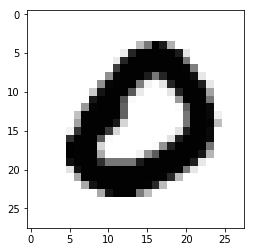

In [3]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

tf.set_random_seed(777) 
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
        
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    print("Learning finished")

    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

## 3.2 Online Learning vs Batch Learning?
### Online Learning is generally described as doing machine learning in a streaming data setting, i.e. training a model in conscecutive rounds. Whereas in batch learning you have access to the whole dataset on train on.

![batch learning](https://github.com/ChulBal/practice_makes_perfect/blob/master/batch_learning.png?raw=true)

 ![online learning](https://github.com/ChulBal/practice_makes_perfect/blob/master/online_learning.png?raw=true)

## 3.2.1 Stochastic Gradient Descent
## What is Stochastic Gradient Descent?
## 1) Batch gradient descent
# ![Standard_GD](https://github.com/ChulBal/practice_makes_perfect/blob/master/Standard_GD.png?raw=true)
## 2) Stochastic gradient descent
###### ![stochastic cost](https://github.com/ChulBal/practice_makes_perfect/blob/master/Stochastic_GD_cost.png?raw=true)
###### ![stochastic](https://github.com/ChulBal/practice_makes_perfect/blob/master/Stochastic_GD.png?raw=true)

##### Kaggle Stochastic Gradient Descent
https://www.kaggle.com/kartikmehtaiitd/stochastic-gradient-descent-0-77355/code

##### Reference
##### http://ruder.io/optimizing-gradient-descent/index.html#stochasticgradientdescent
##### http://adventuresinmachinelearning.com/stochastic-gradient-descent/
##### https://www.slideshare.net/queirozfcom/online-machine-learning-introduction-and-examples

## 3.2.2 Stochastic Gradient Descent with Scikit-Learn

In [3]:
import numpy as np
import os
import sklearn

In [4]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
x, y = mnist["data"], mnist["target"]
import numpy as np
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [5]:
print(x.shape)

(70000, 784)


In [6]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42,loss = 'log', max_iter = 5)

In [7]:
sgd_clf.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train, cv = 3, scoring = "accuracy")

array([ 0.88217357,  0.86174309,  0.86888033])

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.90841832,  0.91089554,  0.91008651])

#### Reference
#### http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
#### https://github.com/ageron/handson-ml/blob/master/03_classification.ipynb

## 3.2.3 Minibatch learning
### Use b examples in each iteration

In [11]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

tf.set_random_seed(777)
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
nb_classes = 10

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [12]:
with tf.Session() as sess:
    
    batch_size = 100
    
    sess.run(tf.global_variables_initializer())
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
        if i % 50 == 0:
            print('cost =', '{:.9f}'.format(c))

    print("Learning finished")
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

cost = 14.030431747
cost = 5.508152962
cost = 3.627789259
cost = 2.575377226
cost = 2.651850224
cost = 1.842662334
cost = 1.736264229
cost = 1.845879078
cost = 1.490944624
cost = 1.063835740
cost = 0.921803713
Learning finished
Accuracy:  0.7539


In [13]:
with tf.Session() as sess:
    
    batch_size = 200
    total_batch = int(mnist.train.num_examples / batch_size)
    sess.run(tf.global_variables_initializer())
        
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
        if i % 25 == 0:
            print('cost =', '{:.9f}'.format(c))

    print("Learning finished")
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

cost = 14.425215721
cost = 9.155404091
cost = 5.874150276
cost = 4.483073711
cost = 3.437642097
cost = 3.344949007
cost = 3.337590218
cost = 2.514959812
cost = 2.446213007
cost = 1.755002737
cost = 2.269384146
Learning finished
Accuracy:  0.6461


In [14]:
with tf.Session() as sess:
    
    batch_size = 10    
    total_batch = int(mnist.train.num_examples / batch_size)
    sess.run(tf.global_variables_initializer())

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
        if i % 500 == 0:
            print('cost =', '{:.9f}'.format(c))

    print("Learning finished")
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

cost = 11.438349724
cost = 0.801296830
cost = 0.737648845
cost = 1.208081841
cost = 1.267851114
cost = 2.895649672
cost = 0.813413143
cost = 0.978428185
cost = 0.028947284
cost = 0.006509293
cost = 2.446244955
Learning finished
Accuracy:  0.8833


#### References
#### http://adventuresinmachinelearning.com/stochastic-gradient-descent/
#### https://www.quora.com/Intuitively-how-does-mini-batch-size-affect-the-performance-of-stochastic-gradient-descent